# Regresión Logística Múltiple (varias variables de entrada y salida sigmoide en (0,1) o (-1,1))

## Ejercicio 8

El archivo **semillas.csv** contiene información de granos que pertenecen a tres variedades diferentes de trigo. Entrene una neurona no lineal para determinar si una semilla es de **TIPO 2** o no. Divida el 60% de los ejemplos para entrenar y el 40% para realizar el testeo. Antes de entrenar, normalice todos los atributos numéricos aplicando media y desvío.

Realice los siguientes experimentos con el fin de analizar cómo distintos hiperparámetros afectan la convergencia y el desempeño del modelo:


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from Fuentes.ClassNeuronaGral import *

DATOS_DIR   = '../../Datos/'
data = pd.read_csv(DATOS_DIR + 'semillas.csv')
number_columns = data.select_dtypes(include=[np.number]).columns
data[number_columns] = (data[number_columns] - data[number_columns].mean()) / data[number_columns].std()
train_data, test_data = train_test_split(data, test_size=0.4, random_state=42)


X_train = train_data.drop(columns=['Clase'])
T_train = (train_data['Clase'] == "Tipo2").astype(int)
X_test = test_data.drop(columns=['Clase'])
T_test = (test_data['Clase'] == "Tipo2").astype(int)

### a) 

Lleve a cabo **20 experimentos**, utilizando la función **sigmoide**, variando la **tasa de aprendizaje** desde $\alpha = 0.04$, incrementando en pasos de **0.04** (es decir, $\alpha = 0.04, ~0.08, \dots, ~0.80$). En cada experimento, registre:
- Curva de **error** (error por iteración).  
- Curva de **accuracy** (precisión por iteración).  
- Cantidad total de iteraciones realizadas.  
- Iteración en la que se alcanzó el **100% de accuracy**.  

Experimento 1, alpha=0.04, Total iteraciones=1000, Iteración 100% accuracy=None


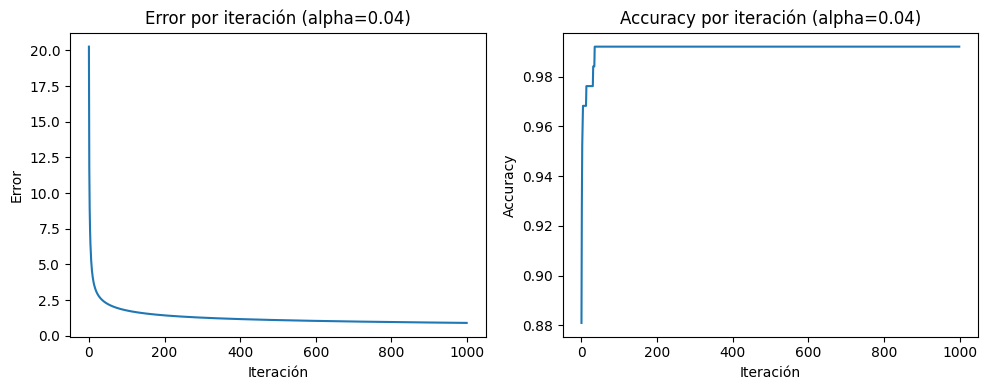

Experimento 2, alpha=0.08, Total iteraciones=1000, Iteración 100% accuracy=None


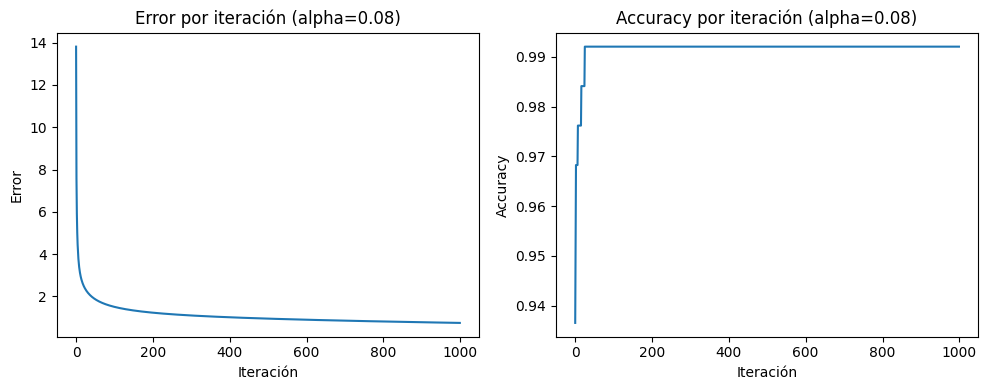

Experimento 3, alpha=0.12, Total iteraciones=1000, Iteración 100% accuracy=None


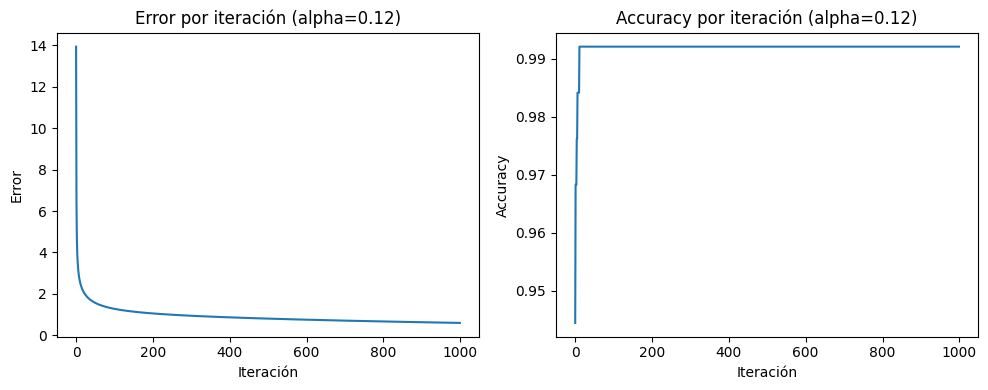

Experimento 4, alpha=0.16, Total iteraciones=1000, Iteración 100% accuracy=892


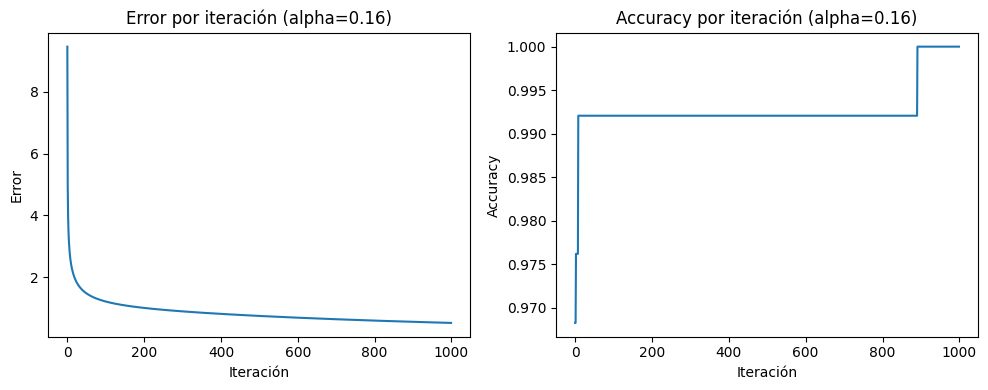

Experimento 5, alpha=0.20, Total iteraciones=1000, Iteración 100% accuracy=688


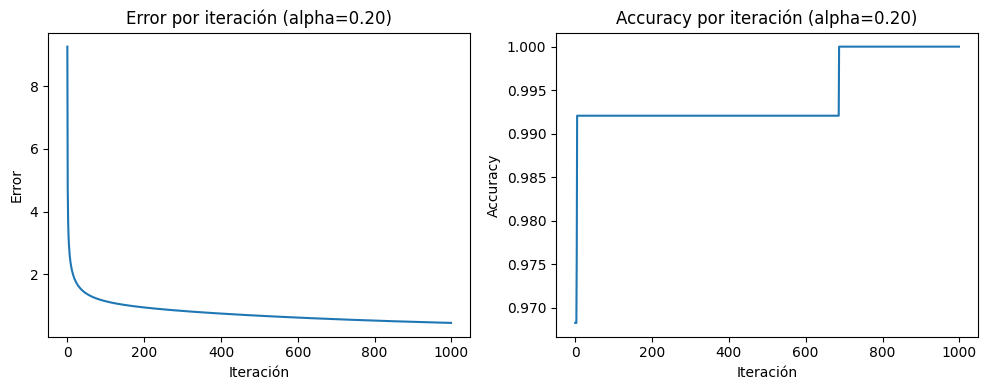

Experimento 6, alpha=0.24, Total iteraciones=1000, Iteración 100% accuracy=587


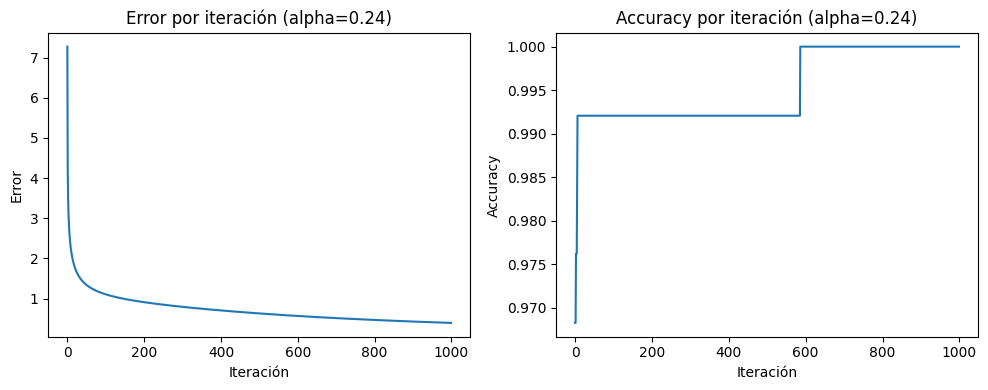

Experimento 7, alpha=0.28, Total iteraciones=1000, Iteración 100% accuracy=500


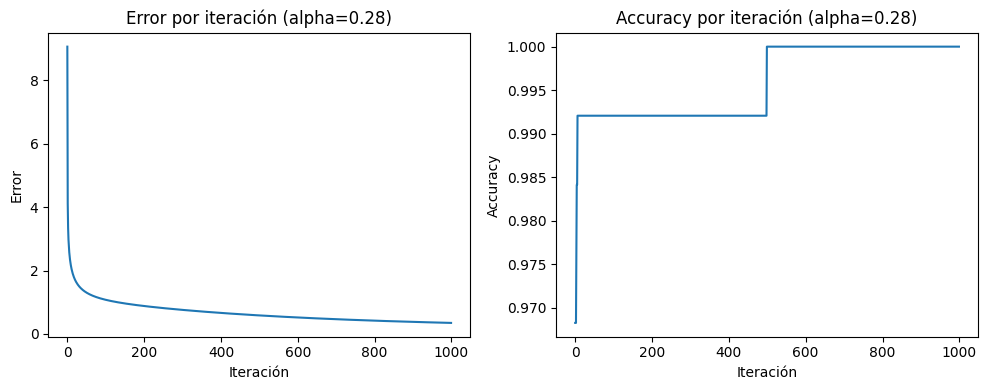

Experimento 8, alpha=0.32, Total iteraciones=1000, Iteración 100% accuracy=411


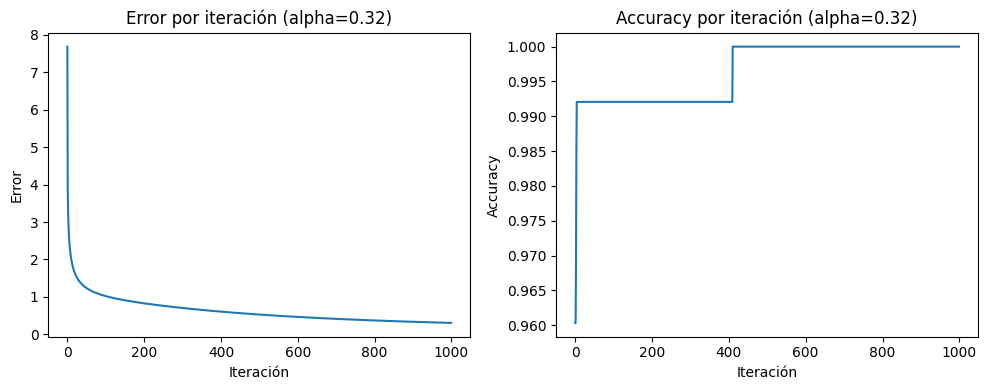

Experimento 9, alpha=0.36, Total iteraciones=1000, Iteración 100% accuracy=356


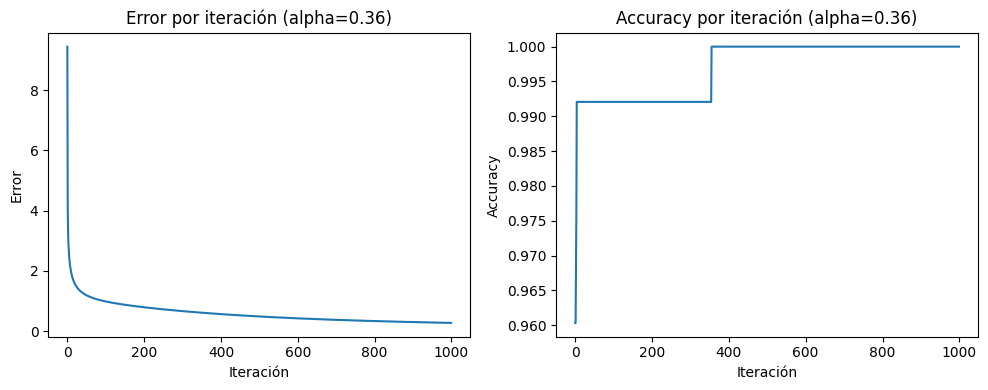

Experimento 10, alpha=0.40, Total iteraciones=1000, Iteración 100% accuracy=345


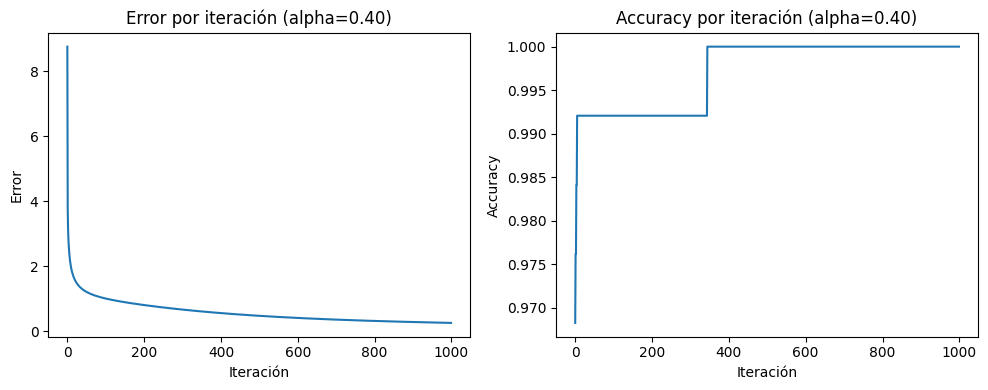

Experimento 11, alpha=0.44, Total iteraciones=1000, Iteración 100% accuracy=285


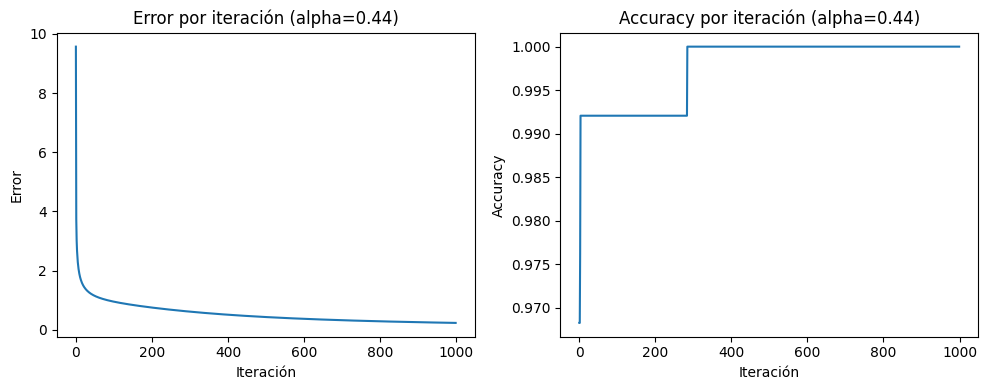

Experimento 12, alpha=0.48, Total iteraciones=1000, Iteración 100% accuracy=255


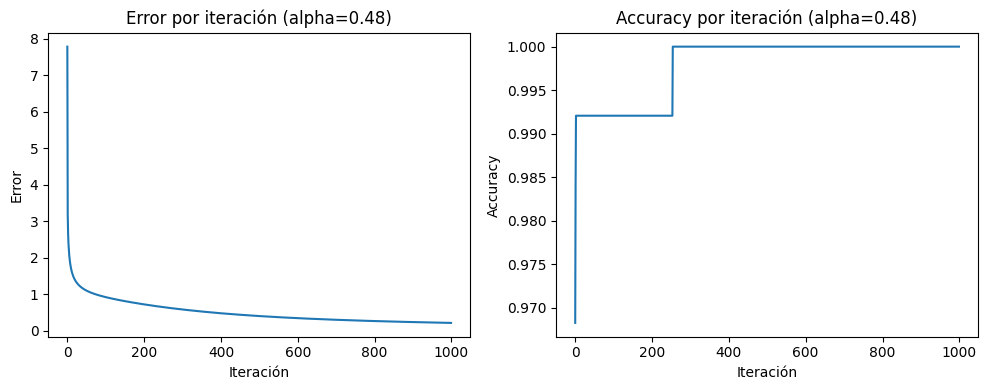

Experimento 13, alpha=0.52, Total iteraciones=1000, Iteración 100% accuracy=243


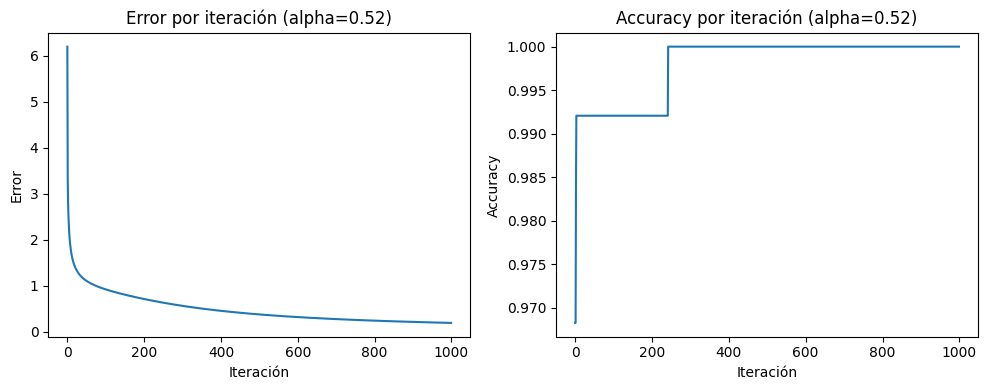

Experimento 14, alpha=0.56, Total iteraciones=1000, Iteración 100% accuracy=211


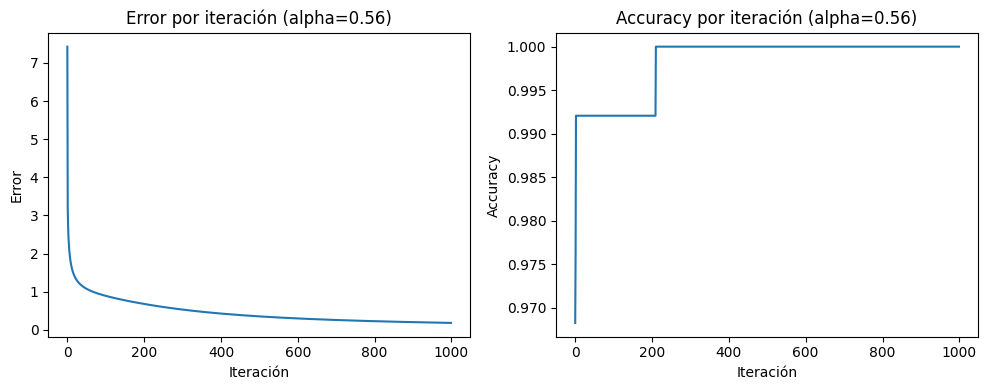

Experimento 15, alpha=0.60, Total iteraciones=1000, Iteración 100% accuracy=208


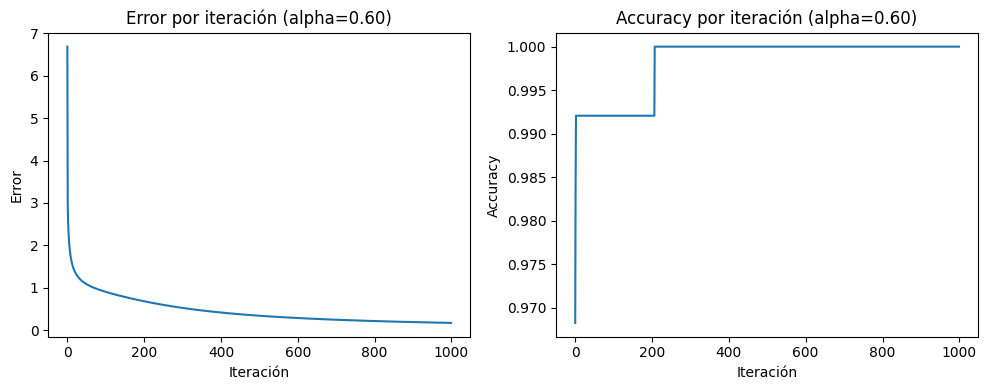

Experimento 16, alpha=0.64, Total iteraciones=1000, Iteración 100% accuracy=188


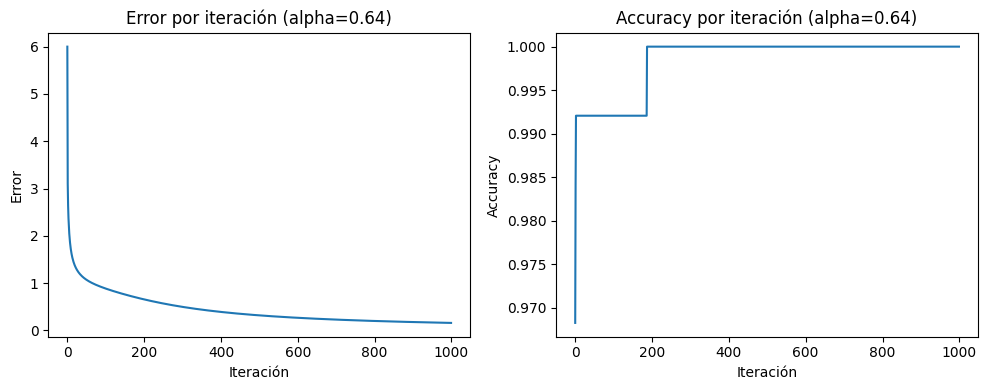

Experimento 17, alpha=0.68, Total iteraciones=1000, Iteración 100% accuracy=177


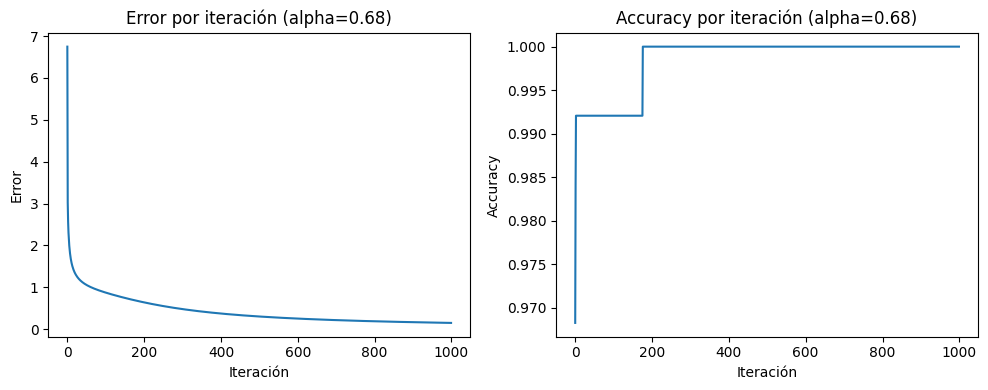

Experimento 18, alpha=0.72, Total iteraciones=1000, Iteración 100% accuracy=165


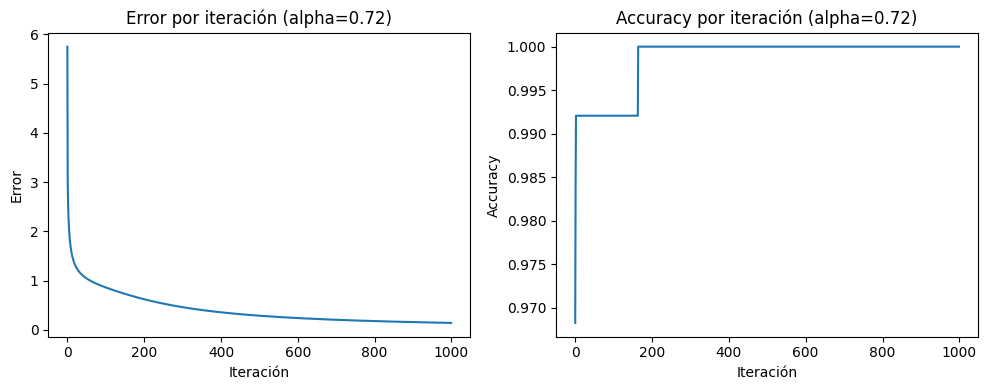

Experimento 19, alpha=0.76, Total iteraciones=1000, Iteración 100% accuracy=159


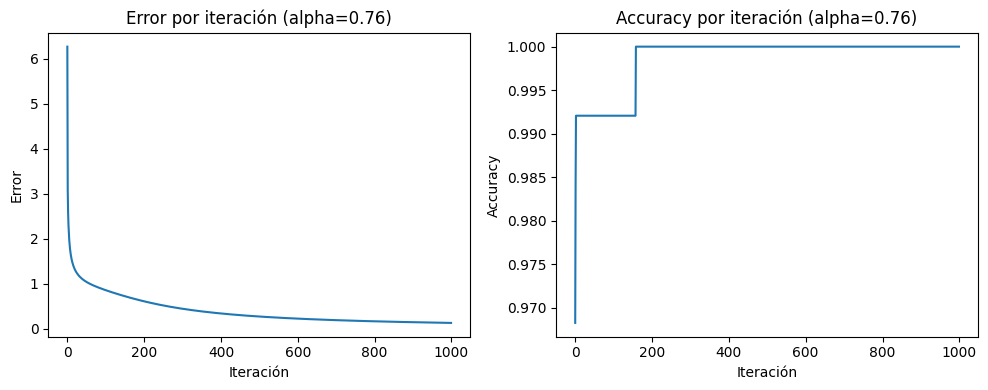

Experimento 20, alpha=0.80, Total iteraciones=1000, Iteración 100% accuracy=139


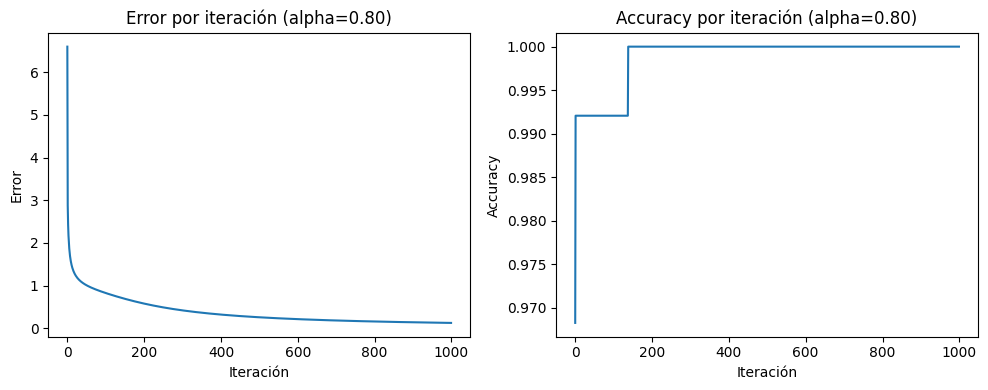

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def run_experiments(X_train, T_train, X_test, T_test, 
                    fun_name='sigmoid', alpha_start=0.04, alpha_step=0.04,
                    num_experiments=20, max_iter=1000, cota=1e-5):
    results = []  # Guardar resultados
    
    for exp in range(num_experiments):
        alpha = alpha_start + exp * alpha_step
        
        ng = NeuronaGradiente(alpha=alpha, n_iter=max_iter, cotaE=cota, FUN=fun_name)
        ng.fit(X_train.values, T_train.values)
        
        errors = ng.errors_
        accuracies = ng.accuracy_
        
        # Iteración donde se alcanza 100% accuracy
        it_100 = None
        for i, acc in enumerate(accuracies):
            if acc == 1.0:
                it_100 = i + 1
                break
        
        # Guardar resultados
        results.append({
            'alpha': alpha,
            'total_iterations': ng.iterations_,
            'it_100_accuracy': it_100,
            'errors': errors,
            'accuracies': accuracies
        })
        
        print(f"Experimento {exp+1}, alpha={alpha:.2f}, Total iteraciones={ng.iterations_}, Iteración 100% accuracy={it_100}")
        
        # Graficar error y accuracy
        plt.figure(figsize=(10,4))
        
        plt.subplot(1,2,1)
        plt.plot(errors)
        plt.title(f'Error por iteración (alpha={alpha:.2f})')
        plt.xlabel('Iteración')
        plt.ylabel('Error')
        
        plt.subplot(1,2,2)
        plt.plot(accuracies)
        plt.title(f'Accuracy por iteración (alpha={alpha:.2f})')
        plt.xlabel('Iteración')
        plt.ylabel('Accuracy')
        
        plt.tight_layout()
        plt.show()

results = run_experiments(X_train, T_train, X_test, T_test, fun_name='sigmoid')


### b) 

Replique el punto a) utilizando **tangente hiperbólica**.  


Experimento 1, alpha=0.04, Total iteraciones=1000, Iteración 100% accuracy=None


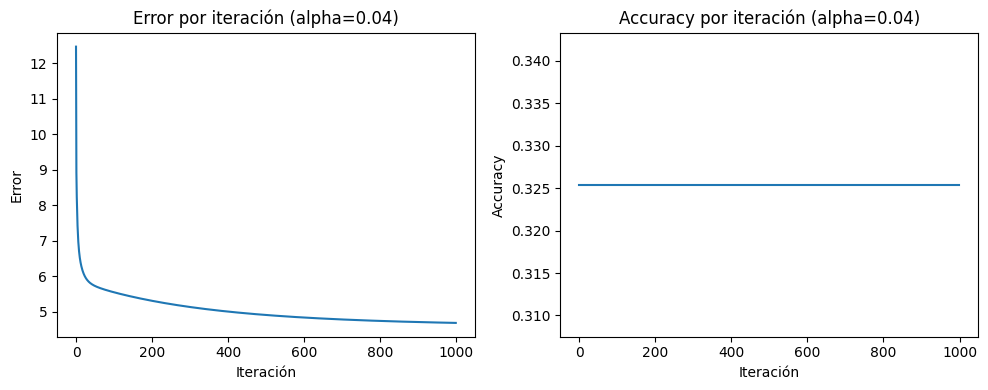

Experimento 2, alpha=0.08, Total iteraciones=1000, Iteración 100% accuracy=None


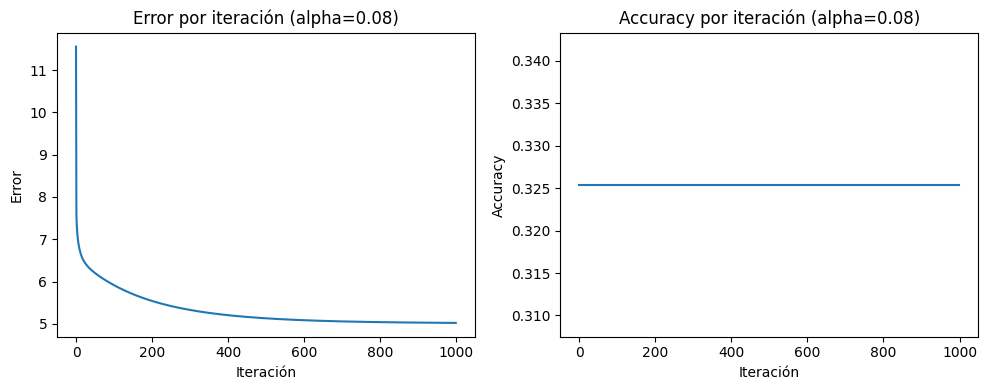

Experimento 3, alpha=0.12, Total iteraciones=1000, Iteración 100% accuracy=None


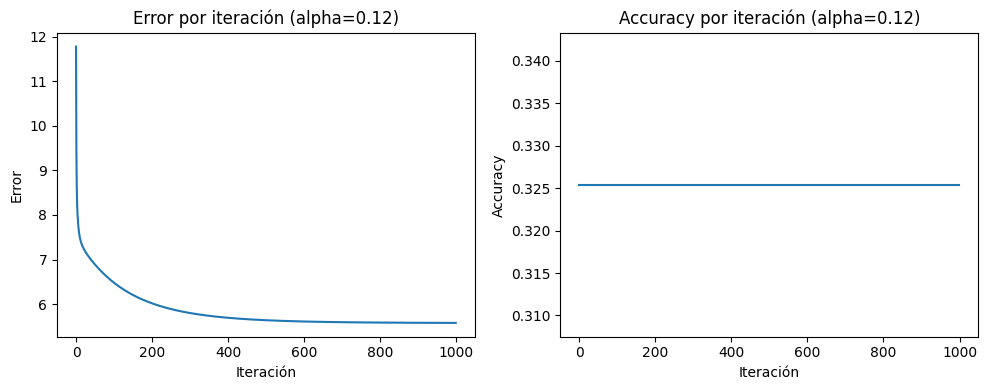

Experimento 4, alpha=0.16, Total iteraciones=1000, Iteración 100% accuracy=None


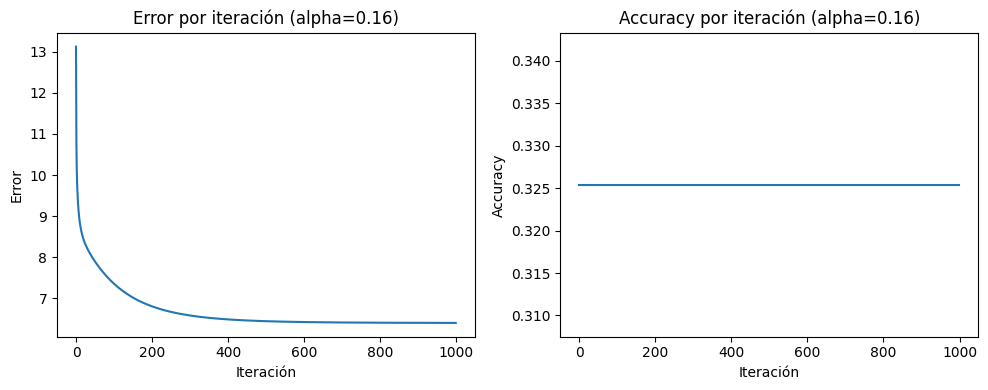

Experimento 5, alpha=0.20, Total iteraciones=721, Iteración 100% accuracy=None


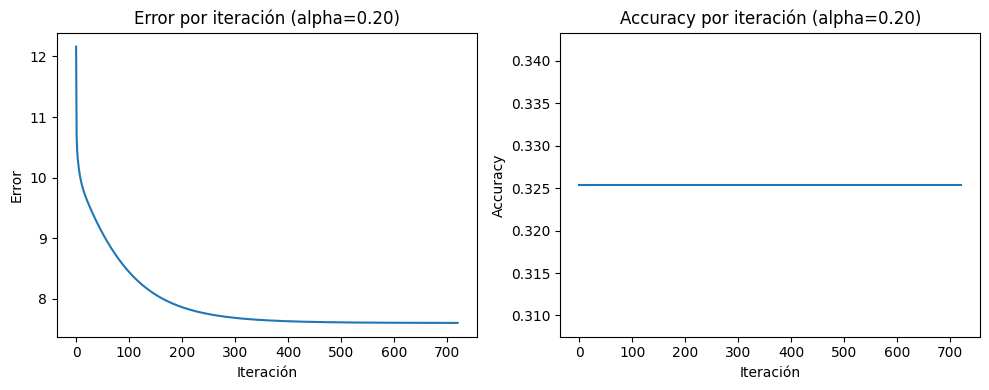

Experimento 6, alpha=0.24, Total iteraciones=268, Iteración 100% accuracy=None


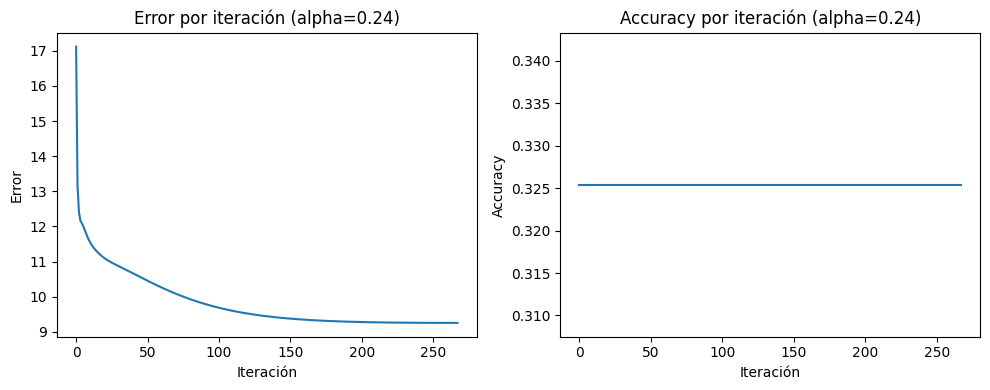

Experimento 7, alpha=0.28, Total iteraciones=351, Iteración 100% accuracy=None


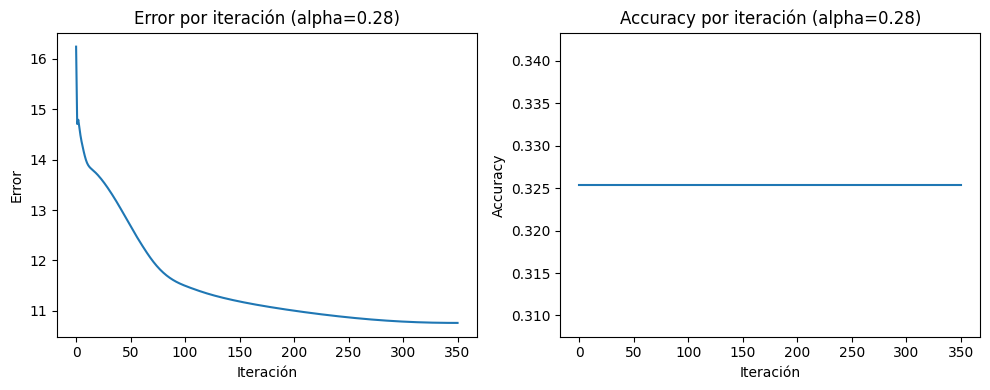

Experimento 8, alpha=0.32, Total iteraciones=1000, Iteración 100% accuracy=None


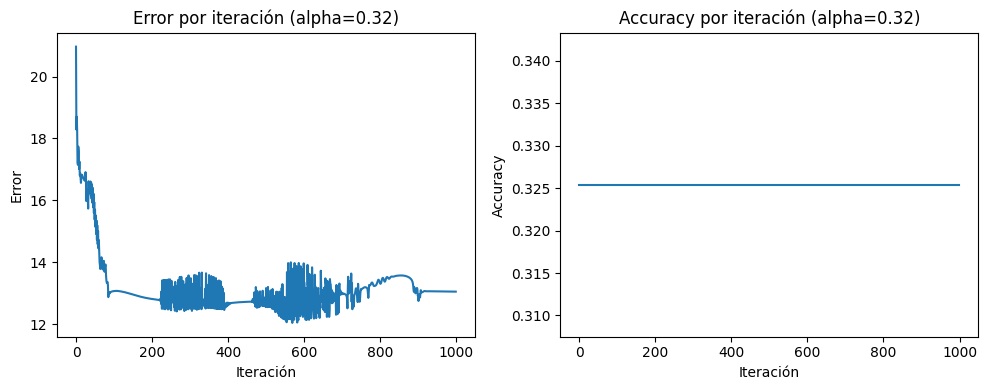

Experimento 9, alpha=0.36, Total iteraciones=1000, Iteración 100% accuracy=None


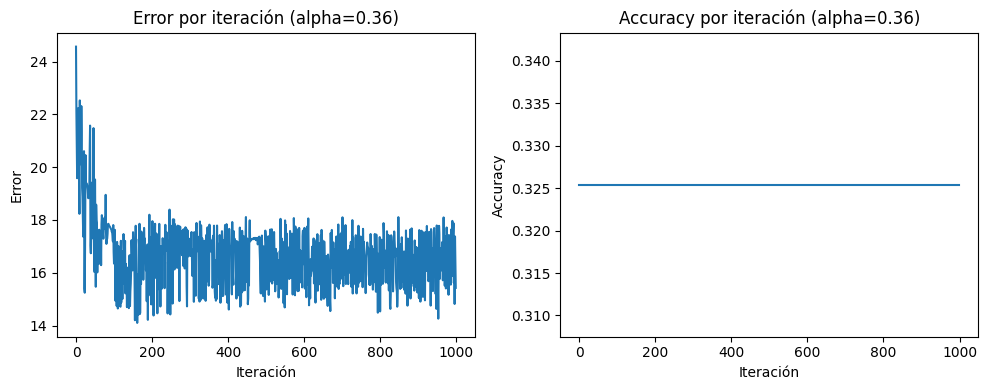

Experimento 10, alpha=0.40, Total iteraciones=1000, Iteración 100% accuracy=None


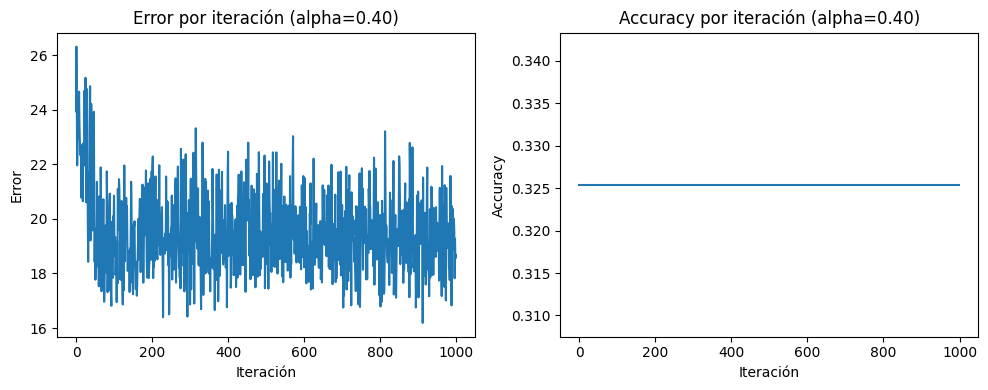

Experimento 11, alpha=0.44, Total iteraciones=1000, Iteración 100% accuracy=None


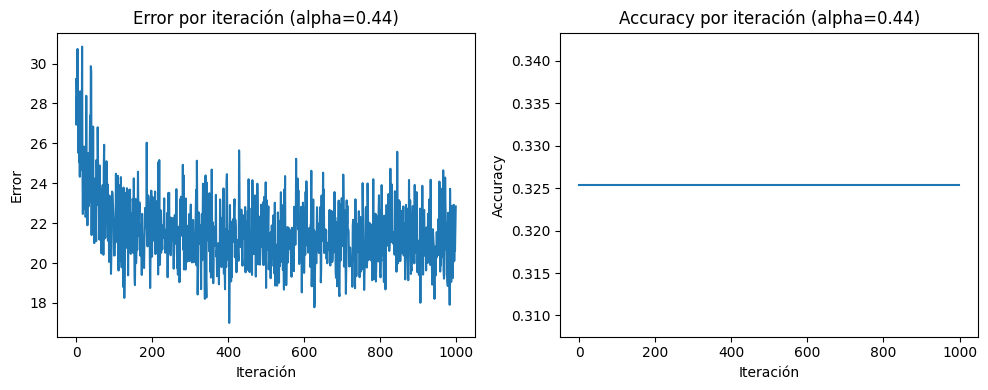

Experimento 12, alpha=0.48, Total iteraciones=1000, Iteración 100% accuracy=None


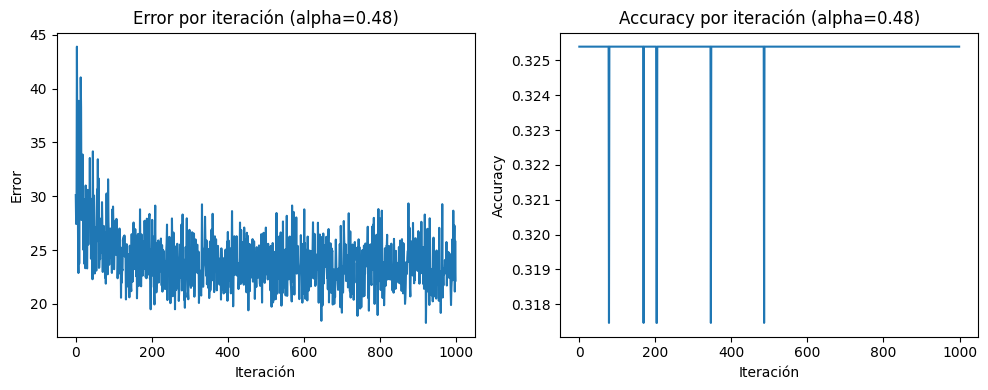

Experimento 13, alpha=0.52, Total iteraciones=1000, Iteración 100% accuracy=None


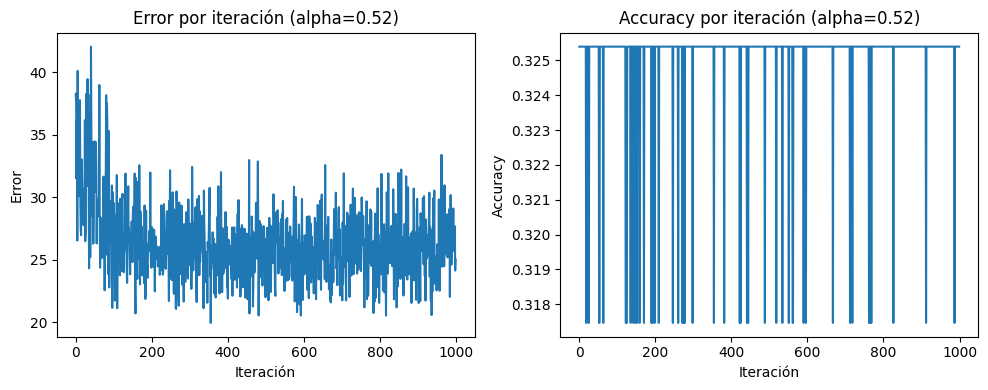

Experimento 14, alpha=0.56, Total iteraciones=1000, Iteración 100% accuracy=None


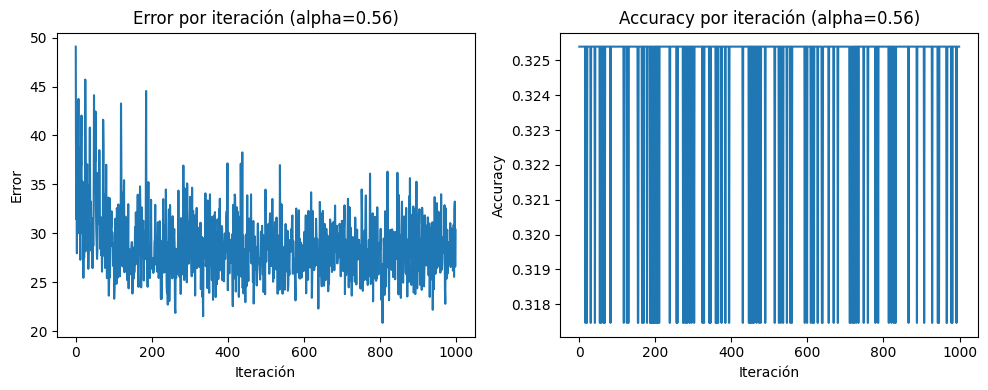

Experimento 15, alpha=0.60, Total iteraciones=1000, Iteración 100% accuracy=None


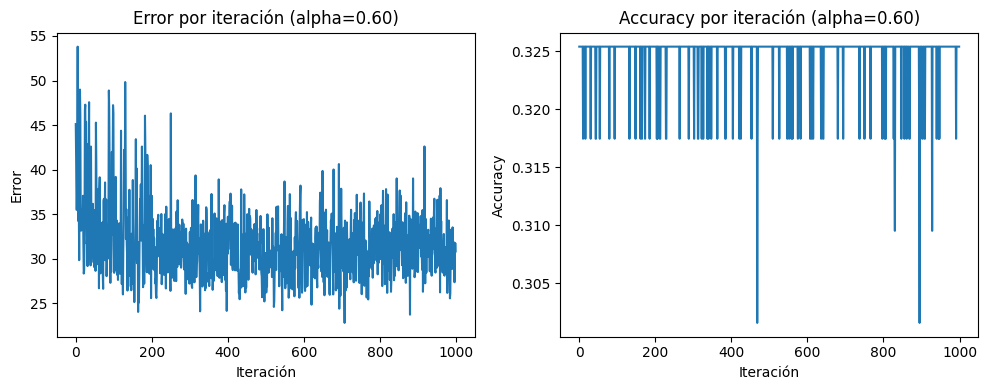

Experimento 16, alpha=0.64, Total iteraciones=1000, Iteración 100% accuracy=None


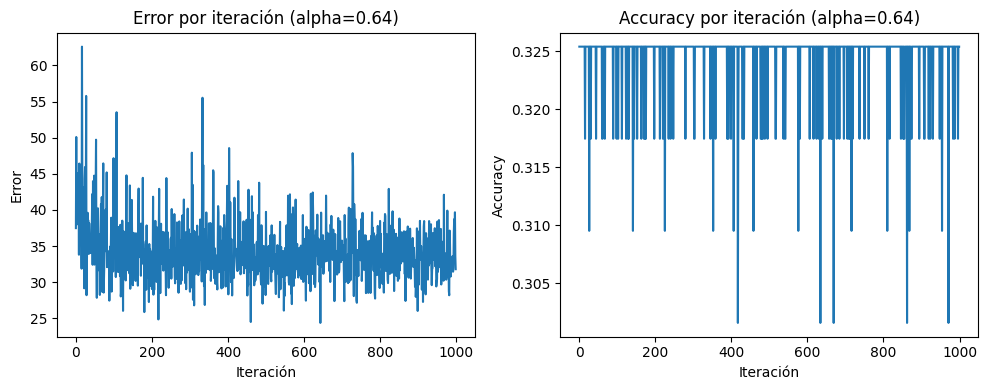

Experimento 17, alpha=0.68, Total iteraciones=1000, Iteración 100% accuracy=None


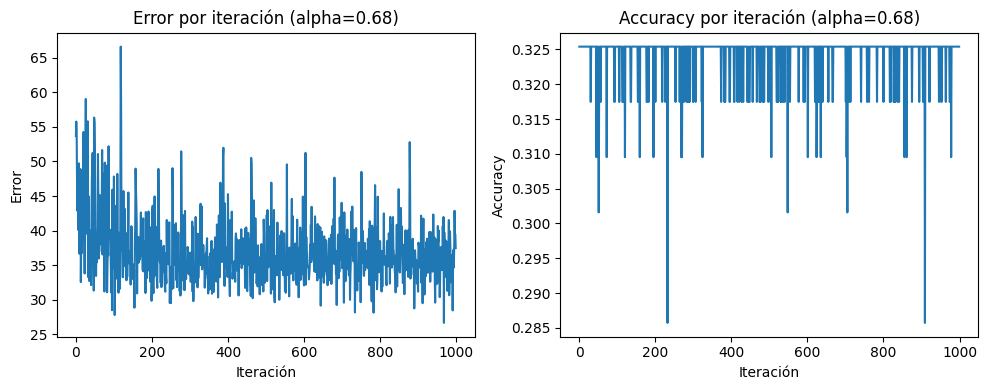

Experimento 18, alpha=0.72, Total iteraciones=1000, Iteración 100% accuracy=None


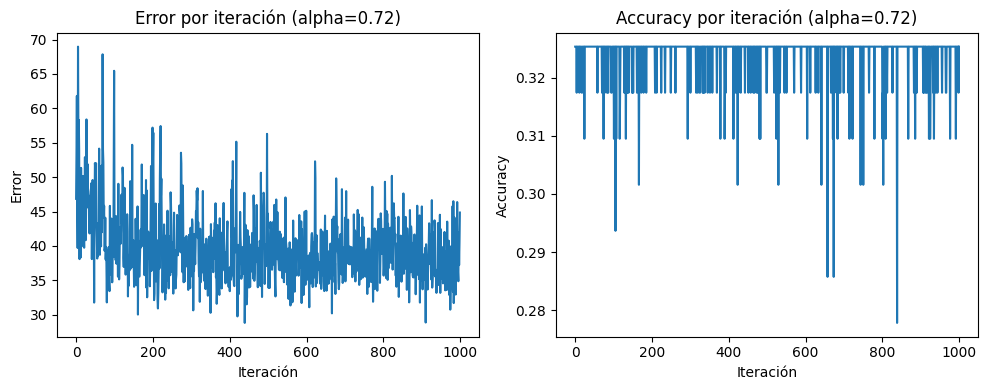

Experimento 19, alpha=0.76, Total iteraciones=1000, Iteración 100% accuracy=None


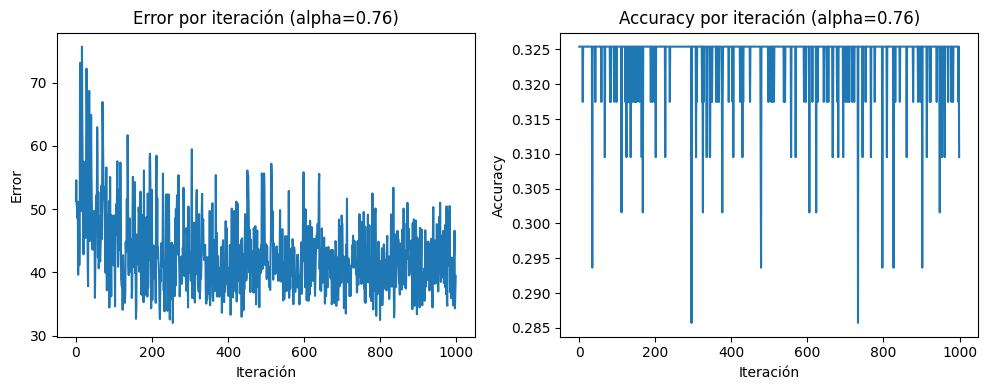

Experimento 20, alpha=0.80, Total iteraciones=1000, Iteración 100% accuracy=None


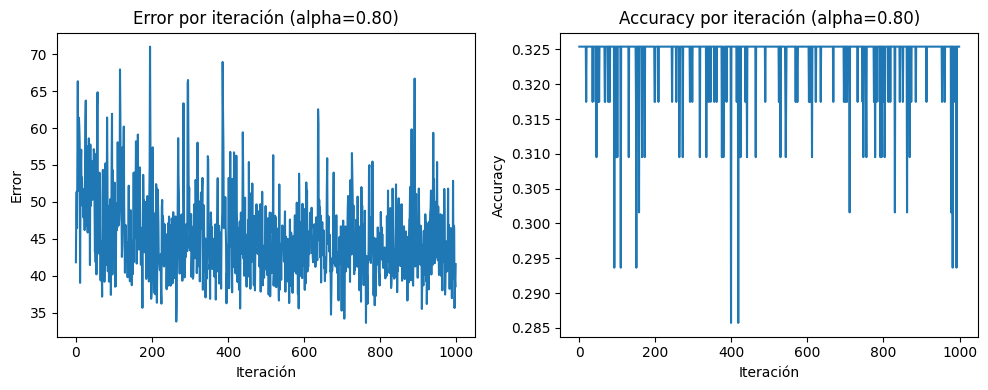

In [34]:
run_experiments(X_train, T_train, X_test, T_test, fun_name='tanh')

### c) 

Compare y analice los resultados obtenidos en a) y b).  

Al comparar los experimentos, con la función sigmoide el error disminuye de forma constante y el accuracy alcanza rápido y se mantiene cerca del 100%, mostrando una convergencia estable. Con tanh, el error es más inestable y el accuracy oscila, llegando a no alcanzar el 100%, especialmente con tasas de aprendizaje altas. En resumen, sigmoid ofrece entrenamientos más estables, mientras que tanh puede ser más rápido en algunas condiciones pero menos predecible.